# STUDENTS SCORES ANALYSIS

In [6]:
# Install necessary libraries using pip
# Make sure to run this in your command prompt or terminalif not alreayd installed

# Install NumPy for numerical operations
# pip install numpy

# Install Pandas for data manipulation and analysis
# pip install pandas

# Install Matplotlib for creating visualizations
# pip install matplotlib

# Install Seaborn for statistical data visualization
# pip install seaborn


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA STUDY AND IMPORTING

In [6]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [9]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# DATA CLEANING

In [10]:
# Check if the column exists before dropping
if 'Unnamed: 0' in df.columns:
    df = df.drop("Unnamed: 0", axis=1)

# Print the DataFrame after dropping the column
print(df.head())


   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Transfromation

In [11]:
# Replace value in the "WklyStudyHours" column
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace(" 05-Oct", "5-10")

# Print the DataFrame after making the change
print(df.head())


   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# ANALYSIS

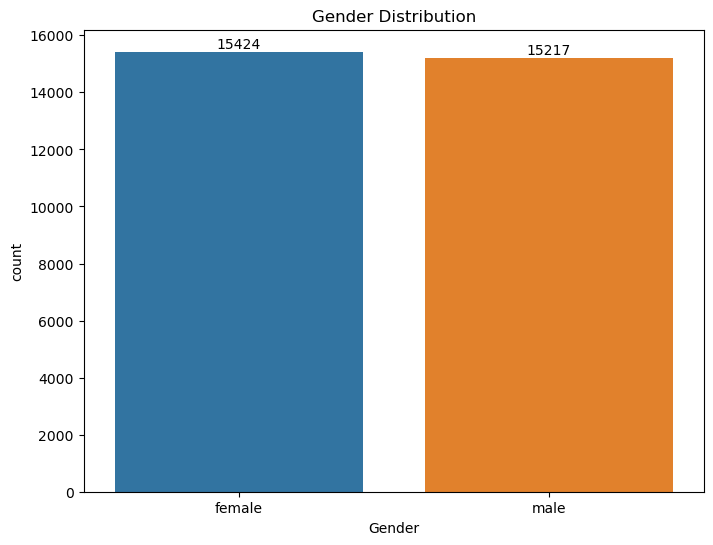

In [12]:
#1.GENDER DISTRIBTUION

# Set the size of the plot
plt.figure(figsize=(8, 6))

# GENDER DISTRIBUTION
ax = sns.countplot(data=df, x="Gender")

# Show count values on top of the bars
ax.bar_label(ax.containers[0])

plt.xlabel("Gender")  # Add x-axis label for clarity
plt.title("Gender Distribution") #for chart title
plt.show()


In [ ]:
#FROM THE ABOVE CHART WE HAVE ANALYSED THAT NUMBER OF FEMALE IN DATA IS MORE THAN MALES

In [13]:
#2 IMPACT OF PARENTS EDUCATION ON STUDENTS SCORE
gb = df.groupby("ParentEduc").agg({
    "MathScore": 'mean',
    "ReadingScore": 'mean',
    "WritingScore": 'mean'
})
print(gb)


                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


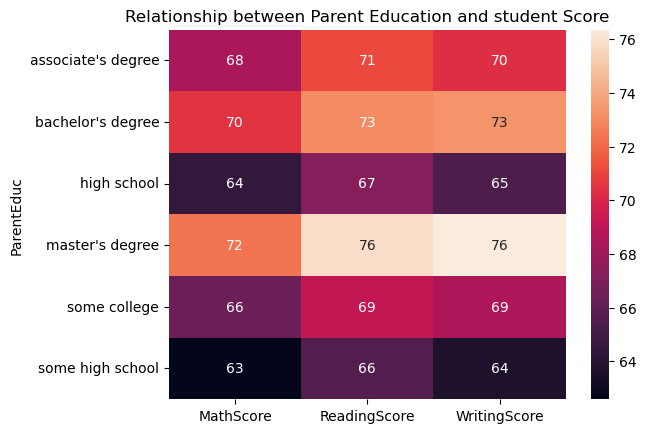

In [14]:
#To see the Above infoamtion in visual form
sns.heatmap(gb, annot = True)
plt.title("Relationship between Parent Education and student Score") #for chart title
plt.show()

In [ ]:
#The chart analysis indicates that the education level of parents has a positive influence on their children's scores.

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


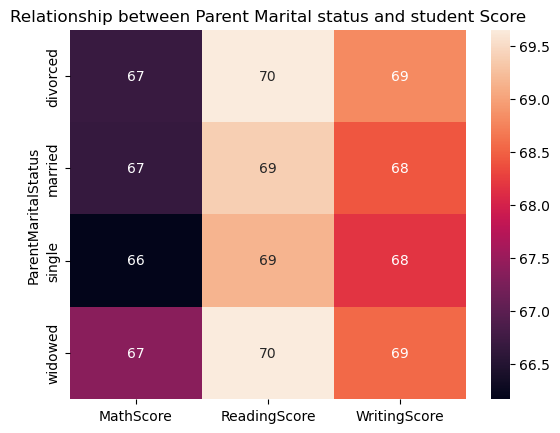

In [15]:
#3 IMPACT OF PARENTS MARITAL STATUS ON STUDENTS SCORE
gb1 = df.groupby("ParentMaritalStatus").agg({
    "MathScore": 'mean',
    "ReadingScore": 'mean',
    "WritingScore": 'mean'
})
print(gb1)

#To see the Above infoamtion in visual form
sns.heatmap(gb1, annot = True)
plt.title("Relationship between Parent Marital status and student Score") #for chart title
plt.show()

In [ ]:
#Both table and heat chart show same informtion
#WE have concluded that there is no/negligible impact on the student's score due to their parents marital status

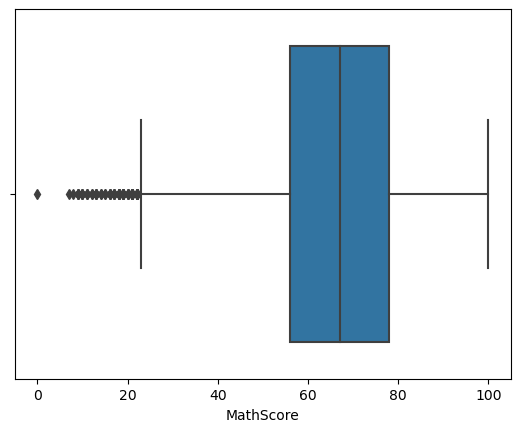

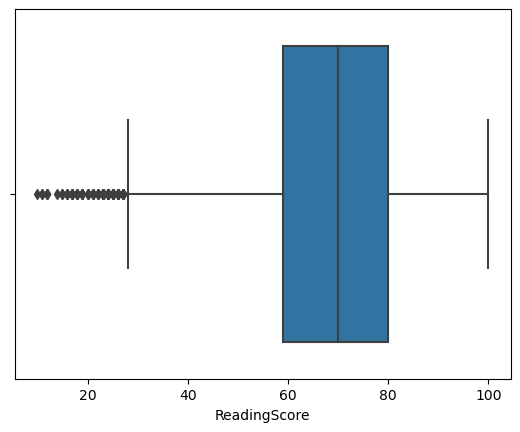

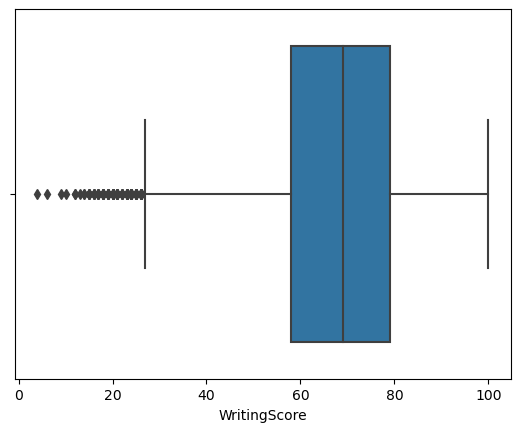

In [16]:
#4 Outliers subjectwise
#boxplot is a useful visualization for identifying outliers in a dataset
#for Mathcscore
sns.boxplot(data = df,x ="MathScore")
plt.show()

#for Readingscore
sns.boxplot(data = df,x ="ReadingScore")
plt.show()

#for Writingscore
sns.boxplot(data = df,x ="WritingScore")
plt.show()


In [18]:
#5.Distribution of Ethnic Group 
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


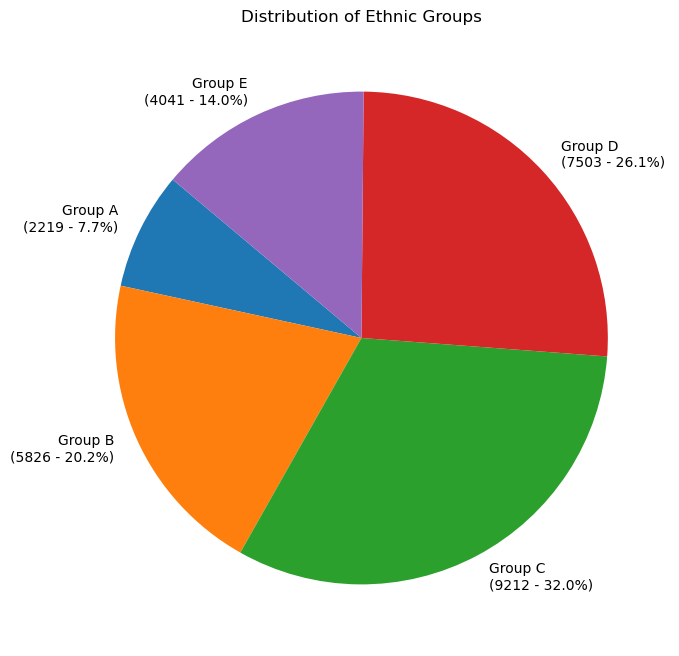

In [81]:
# Count occurrences for each ethnic group
group_counts = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
group_labels = [f'{label}\n({count} - {100 * count / sum(group_counts):.1f}%)' for label, count in zip(["Group A", "Group B", "Group C", "Group D", "Group E"], group_counts)]

# Plot a pie chart without specifying colors
plt.figure(figsize=(8, 8))
plt.pie(group_counts, labels=group_labels, autopct='', startangle=140)
plt.title('Distribution of Ethnic Groups')
plt.show()


In [ ]:
#"The pie chart illustrates the distribution of ethnic groups, indicating the count and percentage representation
#of each group among the surveyed population."